In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
samp_attributes = pd.read_table("/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_2022-06-06_v10_Annotations_SampleAttributesDS.txt", sep='\t')
samp_attributes['individual_id'] = samp_attributes['SAMPID'].str.split('-').str[0:2].str.join('-')

/local/scratch/klawren/slrmtmp.49017132/ipykernel_12731/3213658261.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  samp_attributes = pd.read_table("/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_2022-06-06_v10_Annotations_SampleAttributesDS.txt", sep='\t')


why do samples get excluded?
* XXY
* Lymphoma
* Sepsis
* Large structural variation
* Possible metastatic disease or an infectious process

In [56]:
samp_attributes['is_xxy'] = samp_attributes['SMFLGRMRK'].astype(str).str.contains('XXY')
samp_attributes['is_sv'] = samp_attributes['SMFLGRMRK'].astype(str).str.contains('Large structural variation')

sv_individuals = samp_attributes[samp_attributes['is_sv']]['individual_id'].unique()
xxy_individuals = samp_attributes[samp_attributes['is_xxy']]['individual_id'].unique()

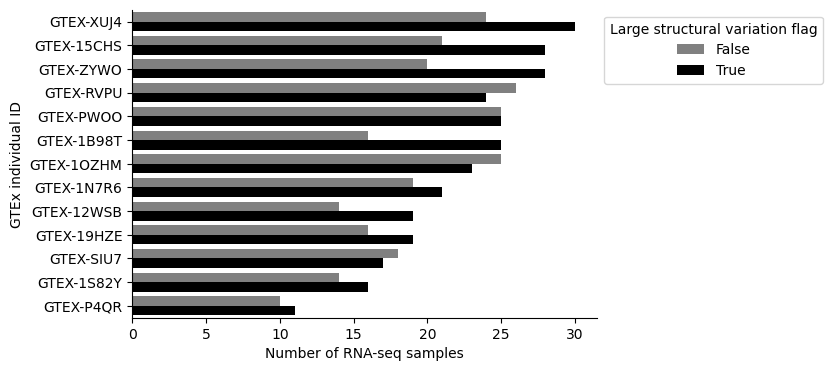

In [81]:
sv_counts = samp_attributes[(samp_attributes['individual_id'].isin(sv_individuals)) & (samp_attributes['SMMTRLTP'] == 'RNA:Total RNA')][['is_sv', 'individual_id']].value_counts().reset_index()
ax = sns.barplot(y='individual_id', x='count', hue='is_sv', data=sv_counts, palette=['grey', 'black'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'Large structural variation flag')
sns.despine(ax=ax)
ax.set_xlabel('Number of RNA-seq samples')
ax.set_ylabel('GTEx individual ID')
ax.figure.set_size_inches(6, 4)



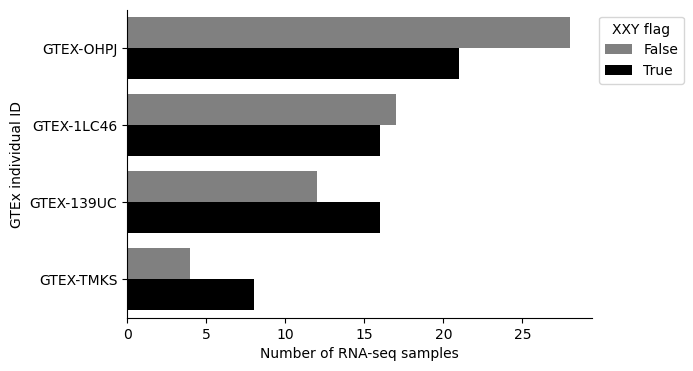

In [87]:
xxy_counts = samp_attributes[(samp_attributes['individual_id'].isin(xxy_individuals)) & (samp_attributes['SMMTRLTP'] == 'RNA:Total RNA')][['is_xxy', 'individual_id']].value_counts().reset_index()
ax = sns.barplot(y='individual_id', x='count', hue='is_xxy', data=xxy_counts, palette=['grey', 'black'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'XXY flag')
sns.despine(ax=ax)
ax.set_xlabel('Number of RNA-seq samples')
ax.set_ylabel('GTEx individual ID')
ax.figure.set_size_inches(6, 4)



use the sample notes instead
* 'Donor has Trisomy 17p. Confirmed by genetic and karyotype analysis.'
* 'Donor is XXY male, Klinefelter Syndrome...'
* 'Donor has Trisomy 21'

In [132]:
samp_attributes[samp_attributes['individual_id']=='GTEX-1LC46']['is_xxy'].sum()

np.int64(17)

In [129]:
xxy_individuals

array(['GTEX-139UC', 'GTEX-OHPJ', 'GTEX-TMKS'], dtype=object)

In [113]:
samp_attributes['sample_type'] = np.nan

xxy_individuals = samp_attributes[samp_attributes['SMNOTES'].astype(str).str.contains('XXY')]['individual_id'].unique()
print("{} samples with XXY".format(len(xxy_individuals)))
samp_attributes['sample_type'][samp_attributes['individual_id'].isin(xxy_individuals)] = 'xxy'
trisomy_21_individuals = samp_attributes[samp_attributes['SMNOTES'].astype(str).str.contains('Trisomy 21')]['individual_id'].unique()
print("{} samples with Trisomy 21".format(len(trisomy_21_individuals)))
samp_attributes['sample_type'][samp_attributes['individual_id'].isin(trisomy_21_individuals)] = 'trisomy_21'
trisomy_17p_individuals = samp_attributes[samp_attributes['SMNOTES'].astype(str).str.contains('17p')]['individual_id'].unique()
print("{} samples with Trisomy 17p".format(len(trisomy_17p_individuals)))
samp_attributes['sample_type'][samp_attributes['individual_id'].isin(trisomy_17p_individuals)] = 'trisomy_17p'


3 samples with XXY
2 samples with Trisomy 21
1 samples with Trisomy 17p


/local/scratch/klawren/slrmtmp.49017132/ipykernel_12731/3019121010.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  samp_attributes['sample_type'][samp_attributes['individual_id'].isin(xxy_individuals)] = 'xxy'
/local/scratch/klawren/slrm

In [ ]:
samp_attributes.columns

In [119]:
samp_attributes.columns[9:11]

Index(['SMSTYP', 'SMTS'], dtype='object')

In [133]:
samp_attributes[samp_attributes['SMMTRLTP']=='RNA:Total RNA']['sample_type'].value_counts()

sample_type
xxy            89
trisomy_21     87
trisomy_17p    37
Name: count, dtype: int64

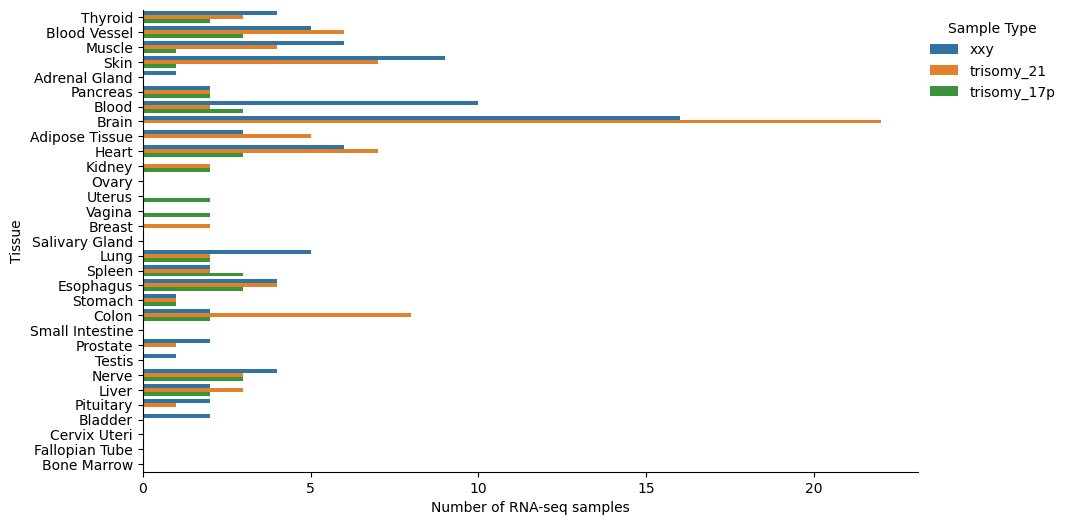

In [128]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(samp_attributes[samp_attributes['SMMTRLTP']=='RNA:Total RNA'], hue='sample_type', y='SMTS', ax=ax)
sns.despine(ax=ax)
ax.set_xlabel('Number of RNA-seq samples')
ax.set_ylabel('Tissue')
ax.legend(title='Sample Type', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

